# Importing libraries

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from mpl_toolkits.basemap import Basemap

# Loading NYC taxi trips database

In [76]:
data_2009 = pd.DataFrame(pd.read_json('/kaggle/input/data-sample_data-nyctaxi-trips-2009-json_corrigido.json', lines=True))

data_2010 = pd.DataFrame(pd.read_json('/kaggle/input/data-sample_data-nyctaxi-trips-2010-json_corrigido.json', lines=True))

data_2011 = pd.DataFrame(pd.read_json('/kaggle/input/data-sample_data-nyctaxi-trips-2011-json_corrigido.json', lines=True))

data_2012 = pd.DataFrame(pd.read_json('/kaggle/input/data-sample_data-nyctaxi-trips-2012-json_corrigido.json', lines=True))

data = pd.concat([data_2009, data_2010, data_2011, data_2012])

vendors = pd.read_csv('../input/data-vendor_lookup-csv.csv')
data['vendors'] = data['vendor_id'].map(dict(vendors.get(['vendor_id', 'name']).values))


# Selecting trips with a maximum of 2 passengers

In [ ]:
max_of_two = data[data.passenger_count < 3]

# Generating the summary of the data

In [ ]:
print(max_of_two.describe())
summary_table = max_of_two.describe().to_html().replace('<table border="1" class="dataframe">',
                                             '<table class="table table-striped">')
print(summary_table)

# Pplotting the mean distance grouped by the number of passengers

<table class="table table-striped">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>passenger_count</th>
      <th>trip_distance</th>
      <th>pickup_longitude</th>
      <th>pickup_latitude</th>
      <th>rate_code</th>
      <th>store_and_fwd_flag</th>
      <th>dropoff_longitude</th>
      <th>dropoff_latitude</th>
      <th>fare_amount</th>
      <th>surcharge</th>
      <th>tip_amount</th>
      <th>tolls_amount</th>
      <th>total_amount</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>3.319652e+06</td>
      <td>3.319652e+06</td>
      <td>3.319652e+06</td>
      <td>3.319652e+06</td>
      <td>0.0</td>
      <td>224.0</td>
      <td>3.319652e+06</td>
      <td>3.319652e+06</td>
      <td>3.319652e+06</td>
      <td>3.319652e+06</td>
      <td>3.319652e+06</td>
      <td>3.319652e+06</td>
      <td>3.319652e+06</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>1.219706e+00</td>
      <td>2.662527e+00</td>
      <td>-7.2789

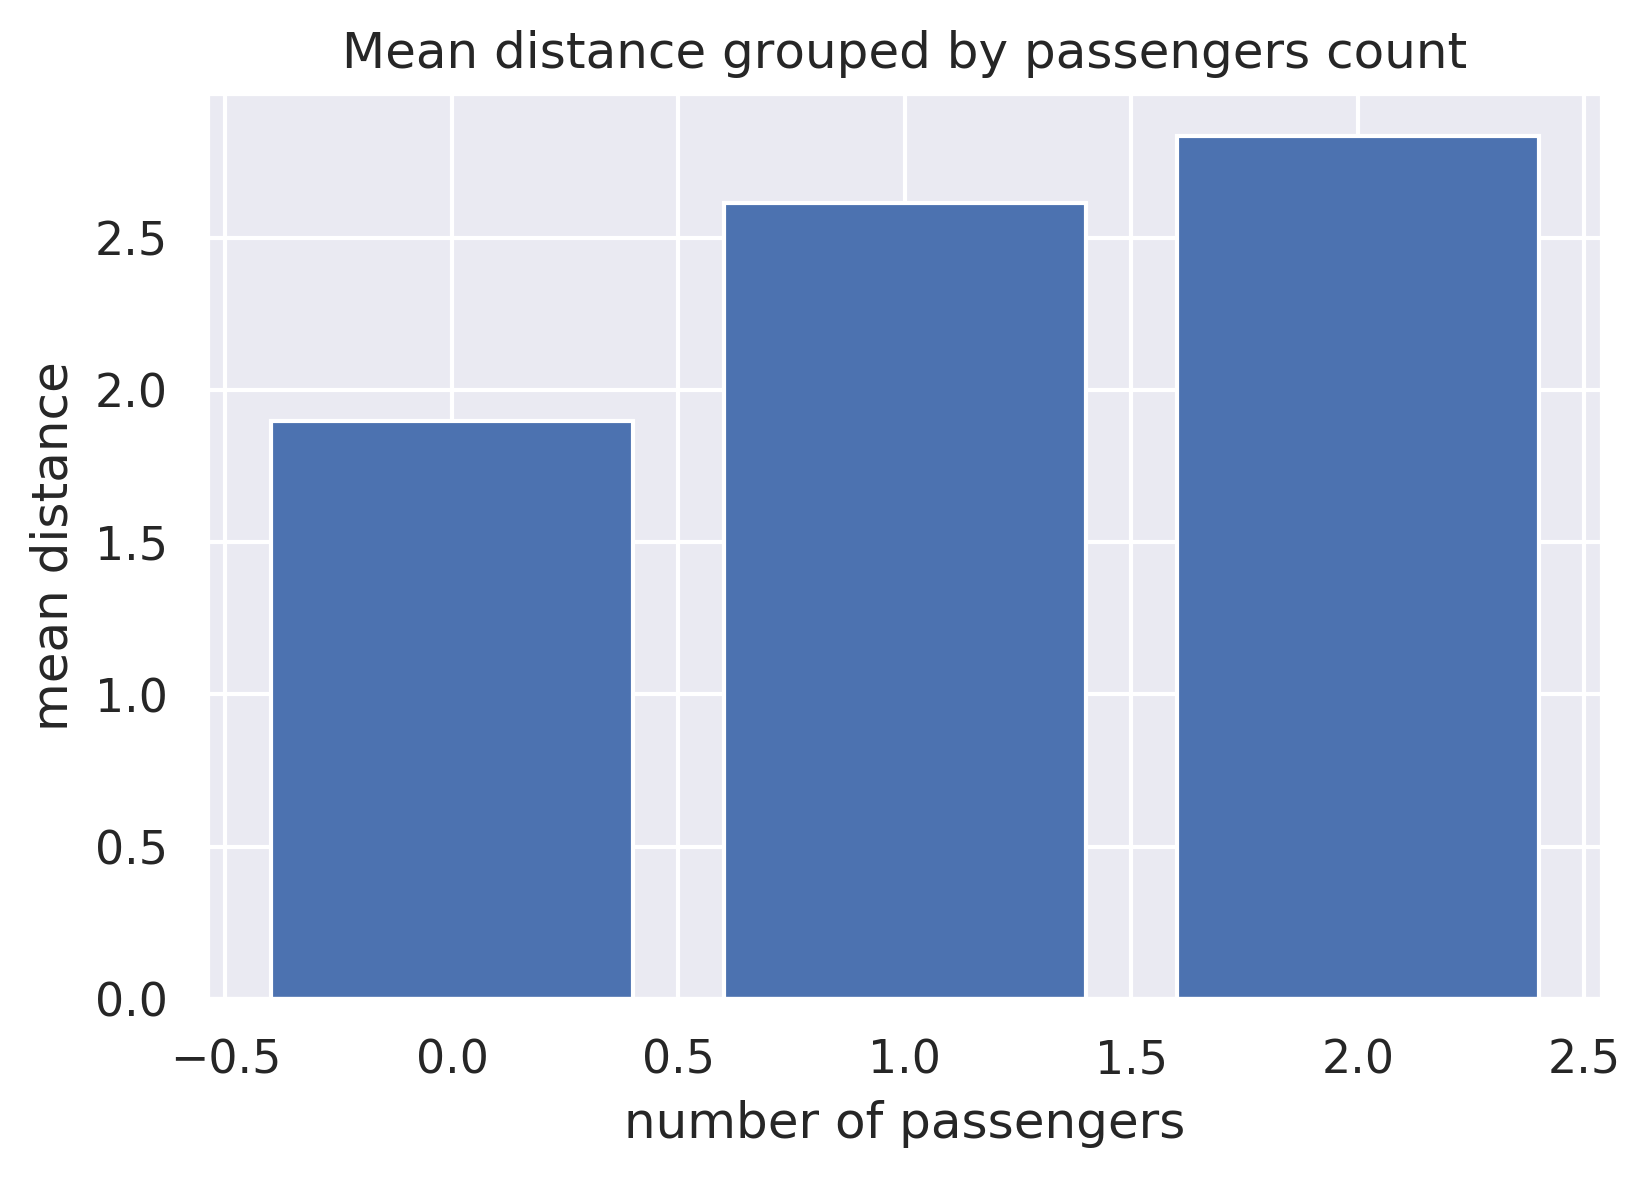

In [77]:
grouped_mean_distance = max_of_two.groupby(['passenger_count'])['trip_distance'].mean()
mean_distance = max_of_two['trip_distance'].mean()

plt.figure(dpi=300)
plt.bar(grouped_mean_distance.index, grouped_mean_distance.values)
plt.title("Mean distance grouped by passengers count")
plt.xlabel("number of passengers")
plt.ylabel("mean distance")
plt.savefig('Mean_distance.png')
plt.show()

# Grouping the data by vendors 

In [ ]:
grouped_vendors_total_amount = data.groupby(['vendors'])['total_amount'].sum().sort_values(ascending=False)

# Ploting the top three based on the total amount of money raised

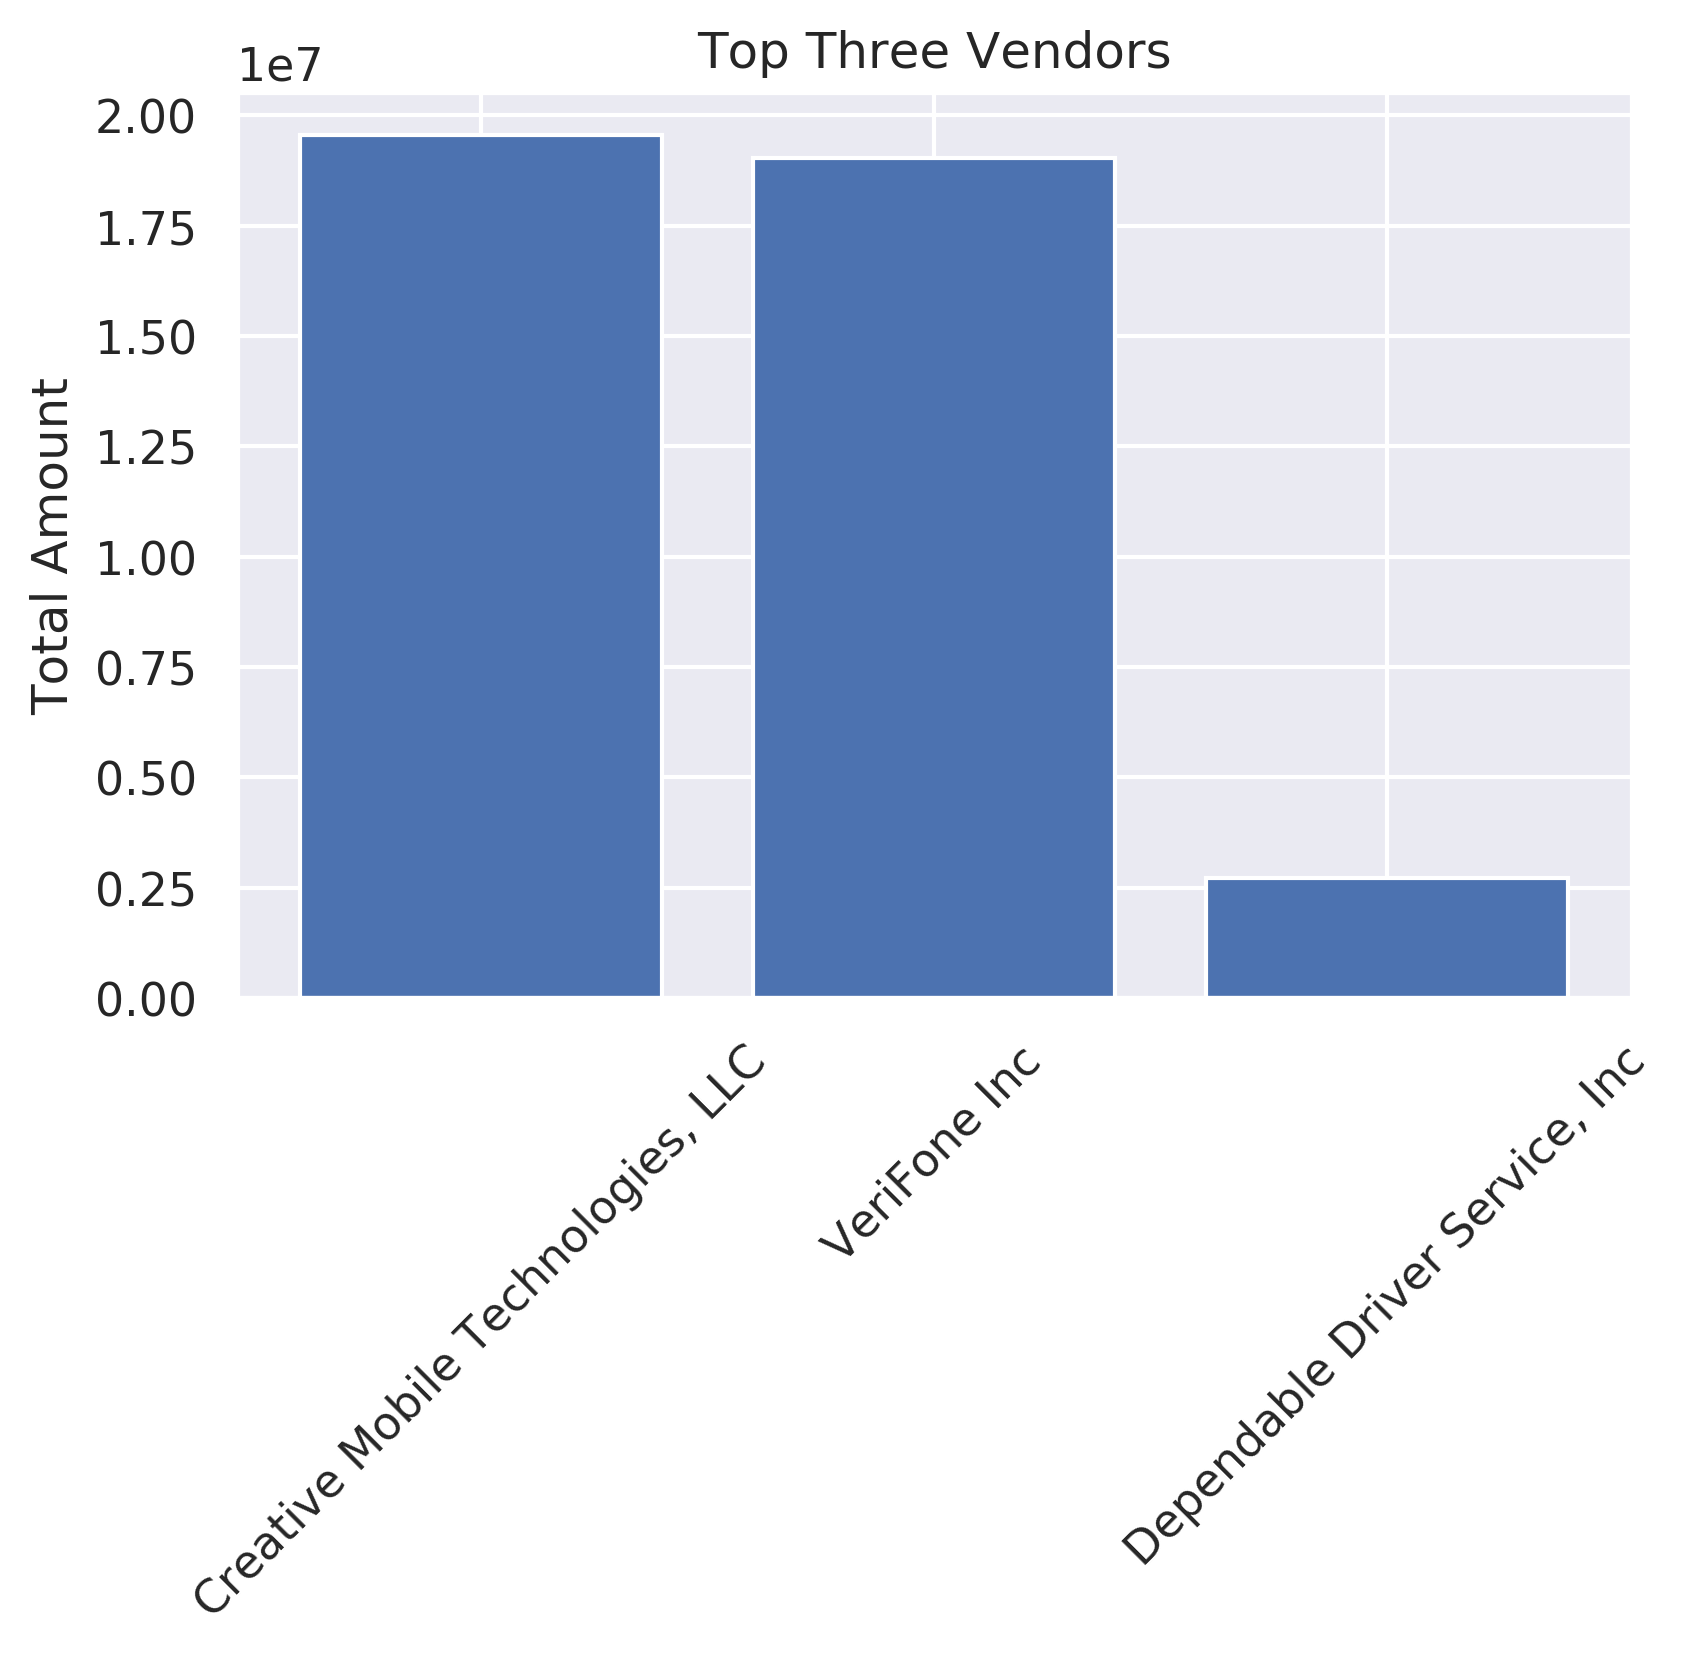

In [78]:
plt.figure(dpi=300)
plt.bar(x=grouped_vendors_total_amount.index[:3], height=grouped_vendors_total_amount.values[:3])
plt.title("Top Three Vendors")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.savefig('Top_Three_Vendors.png')
plt.show()

# Adding column for months 

In [ ]:
data['month'] = pd.DatetimeIndex(data['dropoff_datetime']).month

# Mapping the payment type

In [ ]:
payment = pd.read_csv('../input/data-payment_lookup-csv.csv')

data['payment_type'] = data['payment_type'].map(dict(payment.get(['A', 'B']).values))

# Selecting trips paid with cash

In [ ]:
paid_with_cash = data[data.payment_type == 'Cash']

# Plotting the monthly distribution over 4 years of rides paid with cash

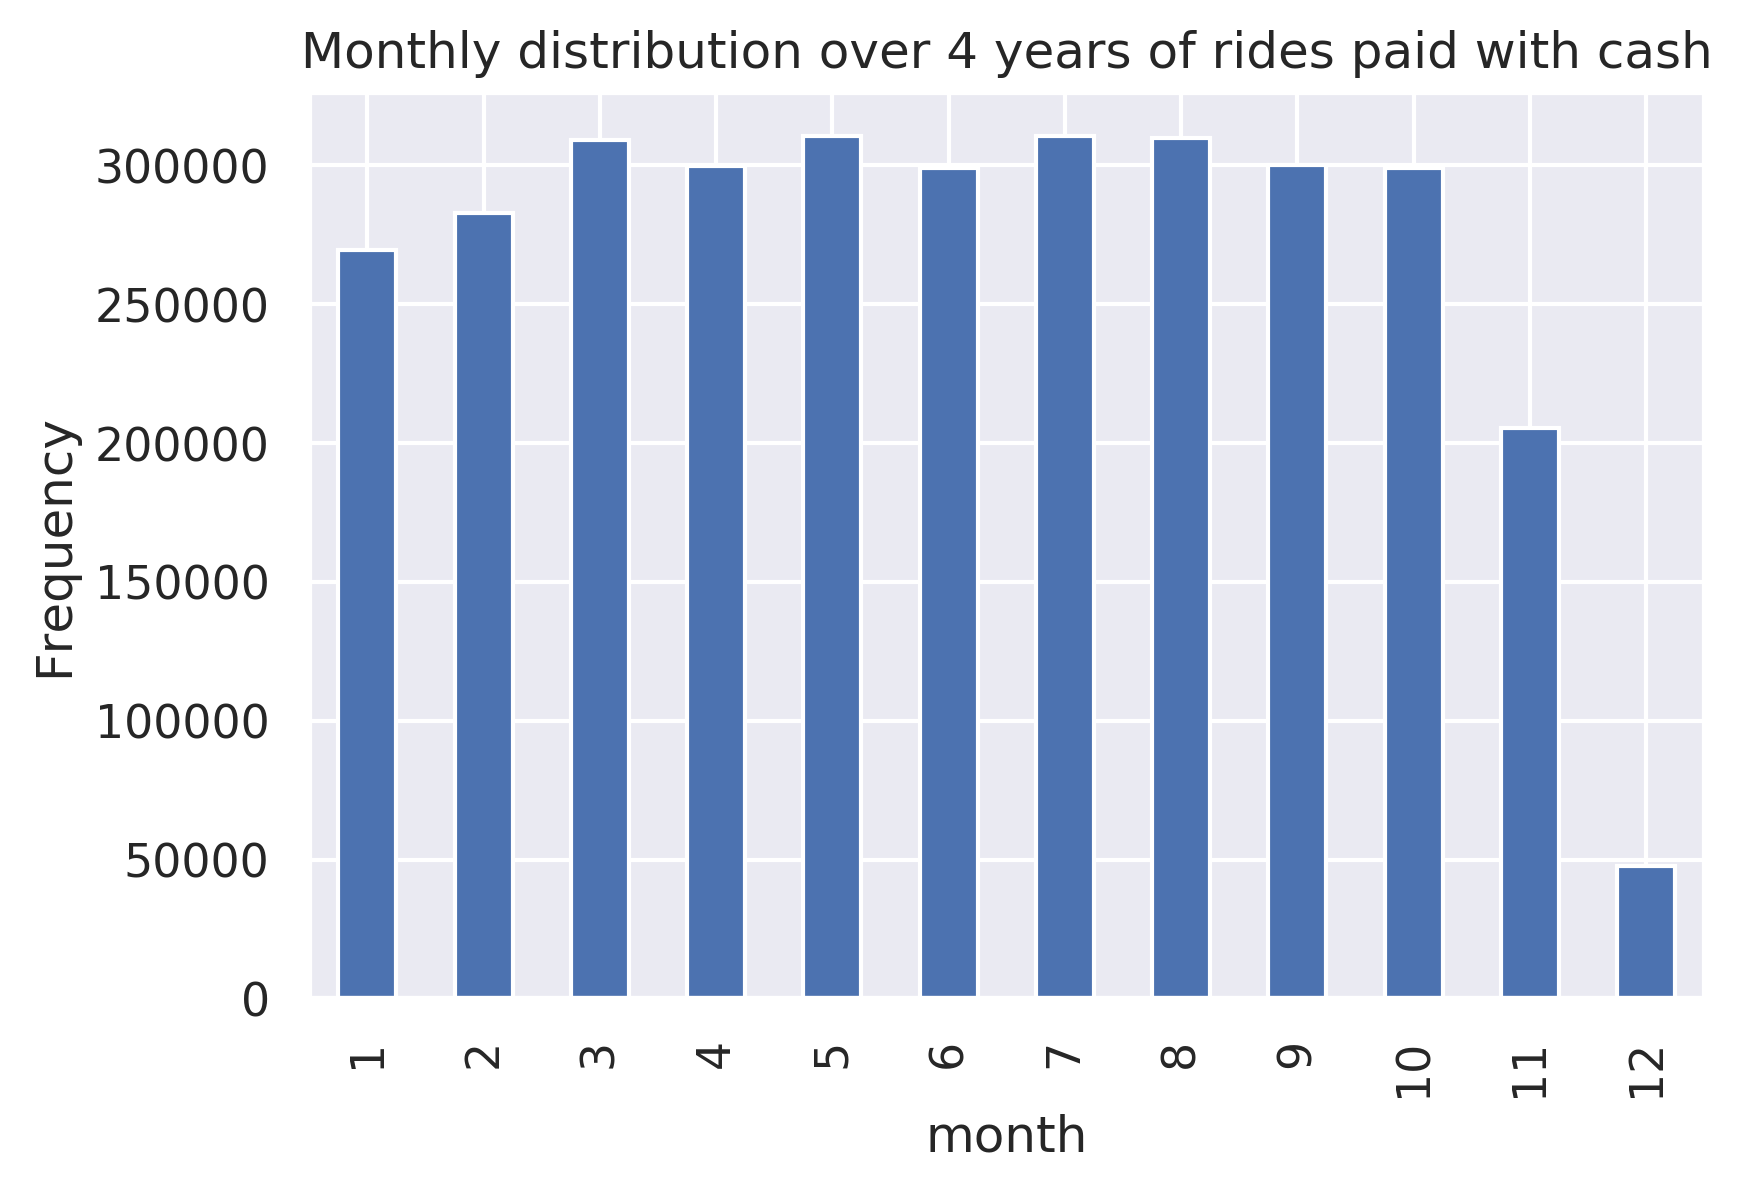

In [79]:
plt.figure(dpi=300)
paid_with_cash.groupby(['month'])['payment_type'].count().plot(kind='bar')
plt.ylabel('Frequency')
plt.title("Monthly distribution over 4 years of rides paid with cash")
plt.savefig('Monthly_distribution.png')
plt.show()

# Adding columns for day, year and date. 

In [ ]:
data['day'] = pd.DatetimeIndex(data['dropoff_datetime']).day
data['year'] = pd.DatetimeIndex(data['dropoff_datetime']).year
data['date'] = pd.DatetimeIndex(data['dropoff_datetime']).date

# Selecting the data from the last three months of 2012

In [ ]:
data_2012 = data[data.year == 2012]
last_three_months = data_2012[data_2012.month > 9]

# Plotting the number of tips each day for the last 3 months of 2012

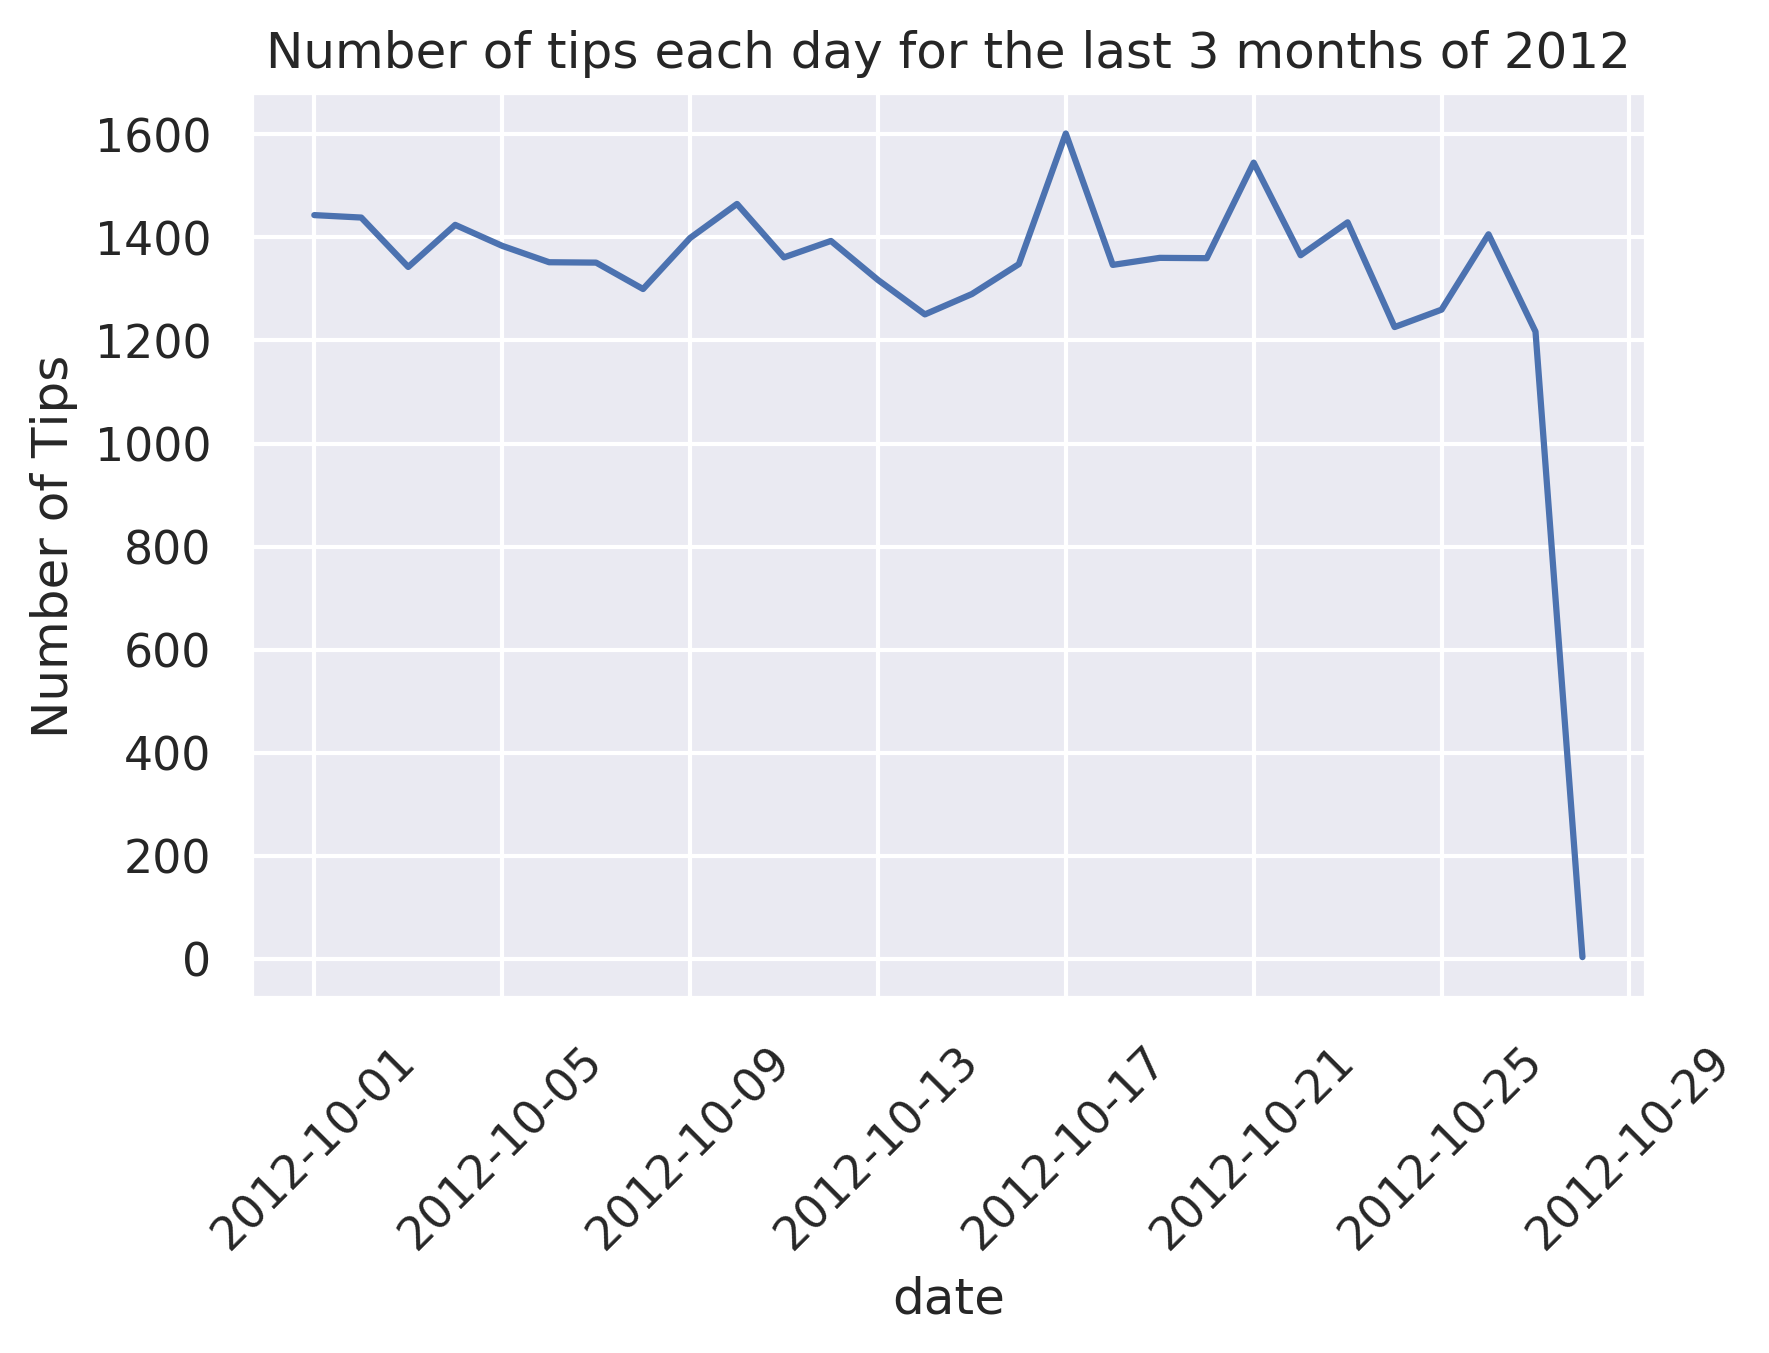

In [80]:
last_three_months_tips = last_three_months.groupby(['date'])['tip_amount'].sum()
plt.figure(dpi=300)
sns.set(style="darkgrid")
sns.lineplot(last_three_months_tips.index, last_three_months_tips.values)
plt.title("Number of tips each day for the last 3 months of 2012")
plt.ylabel("Number of Tips")
plt.xticks(rotation=45)
plt.savefig('Number_of_tips_each_day.png')
plt.show()

# Plottig the latitude and longitude of pickups and dropoffs in the year 2010

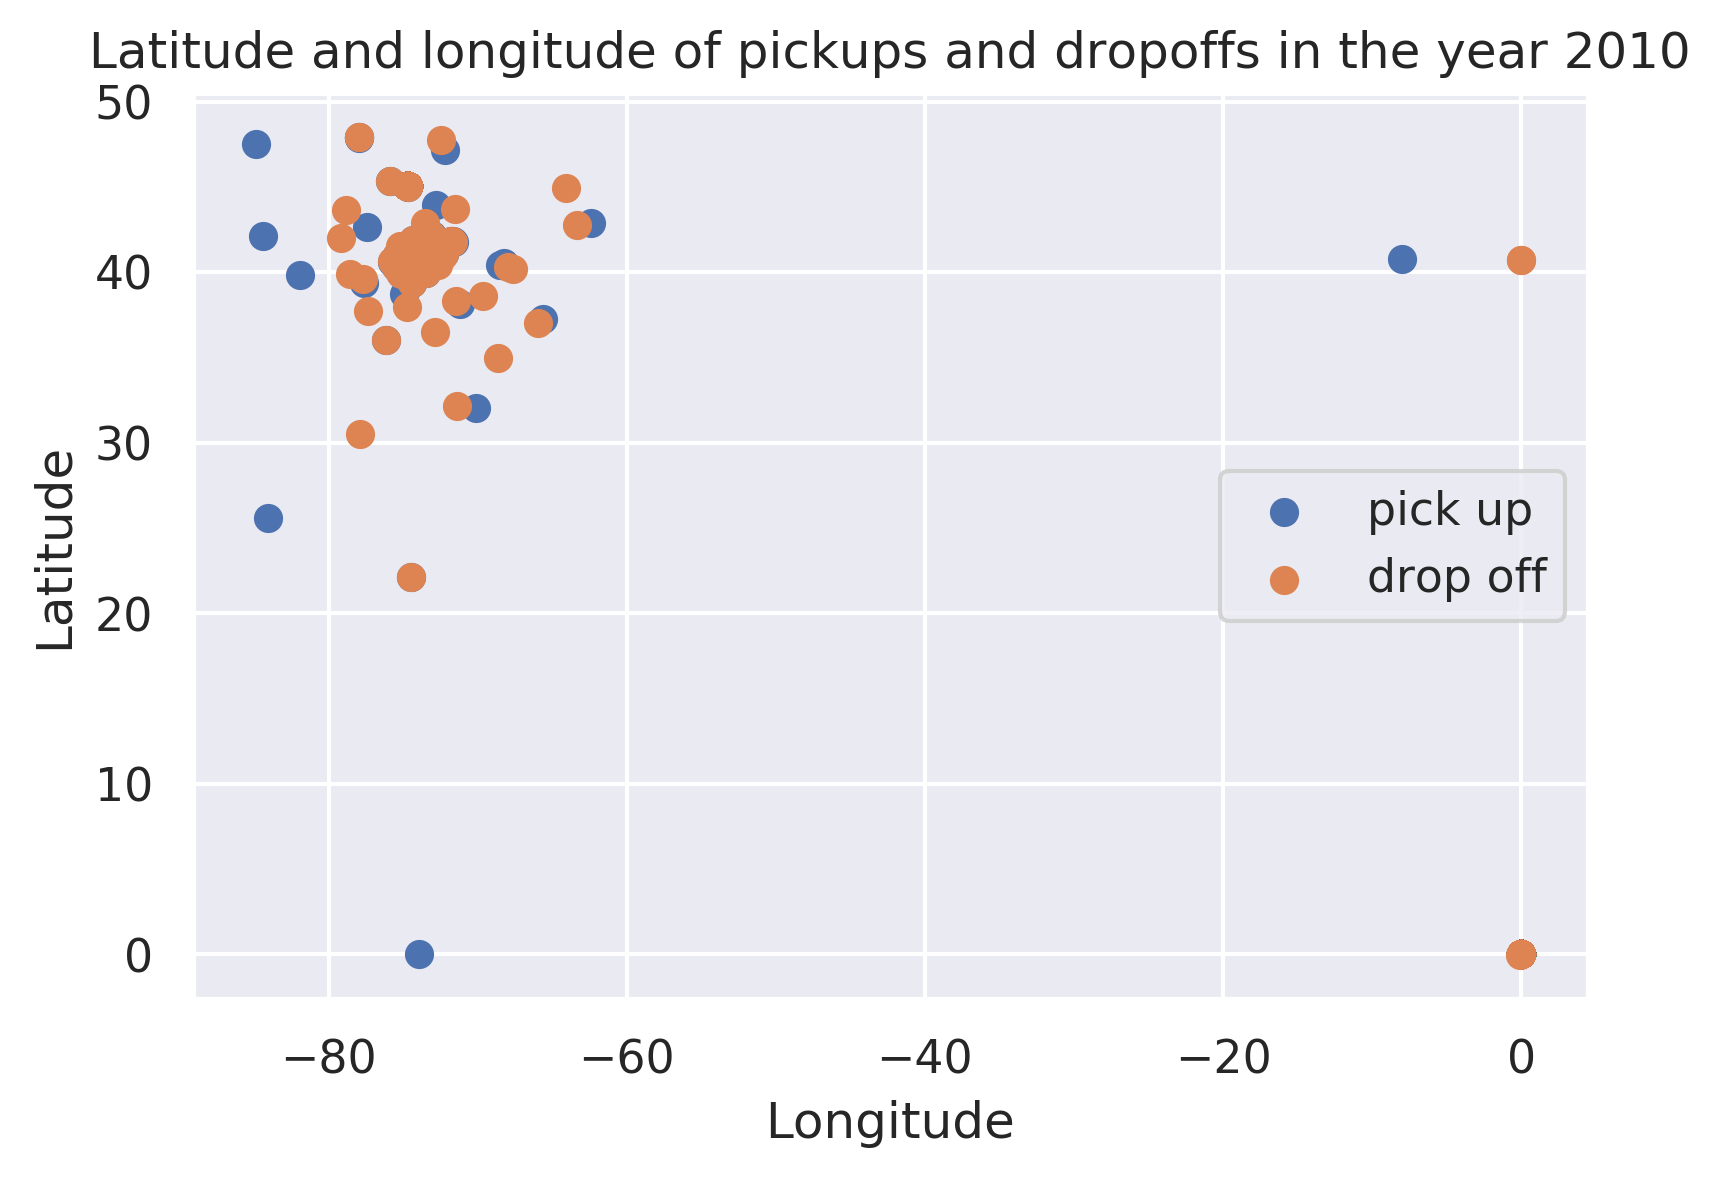

In [81]:
plt.figure(dpi=300)
plt.scatter(data_2010.pickup_longitude, data_2010.pickup_latitude, label='pick up')
plt.scatter(data_2010.dropoff_longitude, data_2010.dropoff_latitude, label='drop off')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.savefig('Dropoff_pickup.png')
plt.title('Latitude and longitude of pickups and dropoffs in the year 2010')
plt.show()